<center><h1> CLASSIFYING DRY BEANS USING COMPUTER VISION SYSTEM (CVS) DATA</h1></center>
<br>
<h2>1. Introduction</h2>
<p>This project aims to develop a system for automatic detection of 7 types of dry bean seeds based on data captured using artificial intelligence-based computer vision system (CVS) </p>

In [136]:
# Importing required libraries
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas as pd
import os
import seaborn as sns
from statsmodels.stats.weightstats import ztest as ztest
import warnings

# Cofiguring the Notebook
warnings.filterwarnings('ignore') # setting ignore as a parameter

%matplotlib inline

# Reading Data from Excel sheet
path = ('./DryBeanDataset/Dry_Bean_Dataset.xlsx')
raw_excel = pd.ExcelFile(path)
beans_data = raw_excel.parse('Dry_Beans_Dataset')
beans_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [137]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// # Code to manage aesthetics of the notebook

<IPython.core.display.Javascript object>

<h2>2. Preliminary Data analysis and sanity checks</h2>
<p>In the following sections basic sanity checks are performed on the data sets to check the validity of the data and obtain an initial insight regarding the dataset. The checks performed include:</p>
<ol>
    <li>Checking for any missing values</li>
    <li>Object type information of the available data</li>
    <li>Number of uniques Classes to be modeled</li>
    <li>Descriptive statistics like - Mean, Standard Deviation, Quartile distribution etc.</li>
</ol>

In [138]:
# Preliminary Data analysis
print("#### SANITY CHECKS #### \n\n#### CHECKING FOR NULL DATA ####\n")
print(beans_data.info())
class_label = beans_data["Class"].unique()
print(f'\n******************************************************************************************************************\
        \n UNIQUE CLASSES: {class_label}')

print("\n*******************************************************************************************************************\
        \n\n#### DESCRIPTIVE SUMMARY ####")
beans_data.describe()

#### SANITY CHECKS #### 

#### CHECKING FOR NULL DATA ####

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## 1.1 Preliminary Observations
<p>Following observations can be made from the above analysis:</p>
<ol>
    <li>There are a total of 17 columns: 16 feature columns and one class identifier which describes the type of the seed.</li>
    <li>Out of the 16 columns 12 are dimensional and 4 are shape features.</li>
    <li>Total observations are 13611 and no value is missing.</li>
    <li>There are a total of 7 uniques classes.</li>
    <li>The descriptive summary table shows that the values belong to different scales and thus need to be normalised to be fit for modeling.</li>
</ol>
<br>
<p>The following section explores different distributions and charts of the features and the class to gain a better understanding of the data.</p>

In [139]:
# Defining plotting function for different plots
def nicePlots(plottype,data,xaxis,yaxis=None,xlabel = None,ylabel = None,title = None):
    if xlabel == None:
        xlabel = xaxis
    if ylabel == None:
        ylabel = yaxis
    plt.figure(figsize=(20,6))
    sns.set_style("whitegrid") 
    sns.set(font_scale = 1.5)
    if plottype == "scatter":
        sns.scatterplot(data = data, x = xaxis, y = yaxis)
    elif plottype == "boxplot":
        plt.figure(figsize=(15,8))
        sns.boxplot(data = data, x=xaxis, y=yaxis,orient = "h")
    elif plottype == "barplot":
        sns.barplot(x=xaxis, y=yaxis, data=data)
    elif plottype == "piechart":
        data[xaxis].value_counts().plot(kind="pie", label=xaxis, title=title, ylabel=ylabel,
                                        autopct='%1.1f%%', shadow=True, explode=(0.1, 0, 0, 0, 0, 0, 0))

    if plottype != "piechart":
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
    return plt

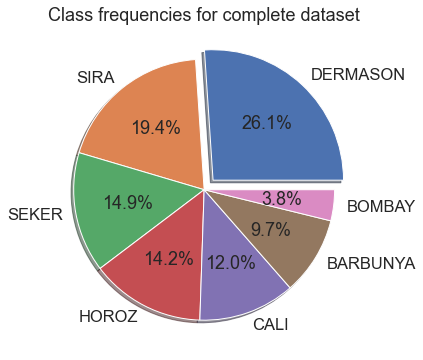

In [140]:
# Class frequencies before splitting sample
classPiechart = nicePlots("piechart",beans_data, "Class", ylabel="", title='Class frequencies for complete dataset')

<p>The above pie-chart shows that the dominant class in the dataset is Dermason closely followed by Sira and the least data is available for Bombay beans. Next we will try to analyse the data to get more insights and underlying patterns.</p>

<h2>2. Exploratory Data Analysis</h2>

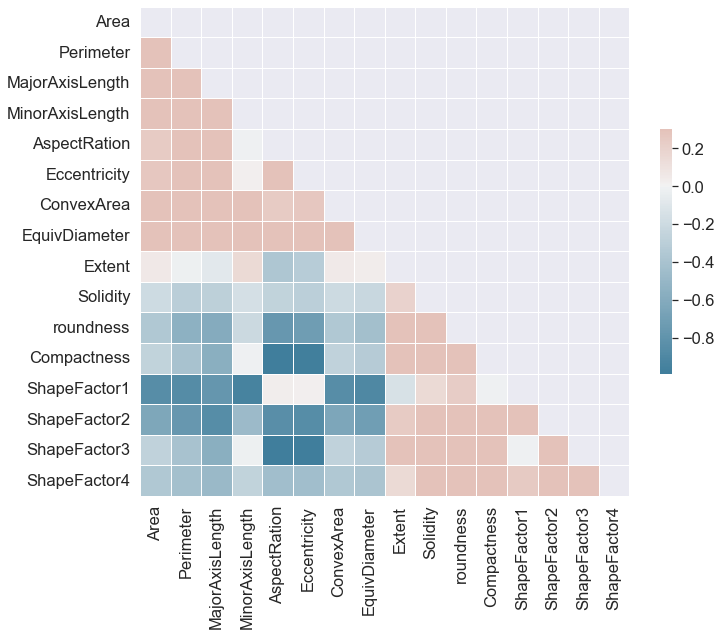

In [141]:
# Defining function to create correlation heat map
def corrHeatMap(d):
# Compute the correlation matrix
    corr = d.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
# Creating dataset for constructing a correlation matrix
features = beans_data.drop("Class", axis=1)
corrHeatMap(features)

<p>Correlation Analysis shows that some of the features are highly correlated due to the fact that these are mostly dimensional features. Removing these features would help to reduce dimensionality and hence computation, lower  risk of overfitting the data and ease of conducting further. On ther other hand, there may be some loss of information and hence a probable reduction in accuracy of the model. The following features will be dropped from further analysis:</p>
<ol>
    <li>Compactness</li>
    <li>Shape Factor 1</li>
    <li>Shape Factor 2</li>
    <li>Shape Factor 3</li>
    <li>Area</li>
    <li>Aspect Ratio</li>
    <li>Eccentricity</li>
</ol>

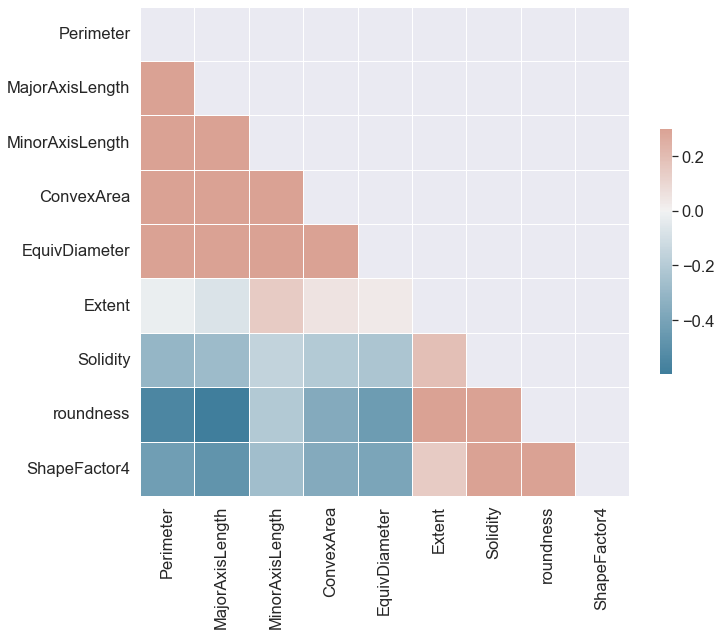

In [142]:
# Dropping the highly correlated columns
beans_data_comp = beans_data.drop(['Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'Area', 'AspectRation', 'Eccentricity'], axis=1)
features = beans_data_comp.drop("Class", axis=1)
corrHeatMap(features)

In [143]:
# create StandardScaler object
scaler = StandardScaler()

# fit and transform the dataframe
feature_columns=beans_data_comp.columns[0:9]

beans_data_comp[feature_columns] = scaler.fit_transform(beans_data_comp[feature_columns])
features = beans_data_comp.drop("Class", axis=1)
labels = beans_data_comp["Class"]

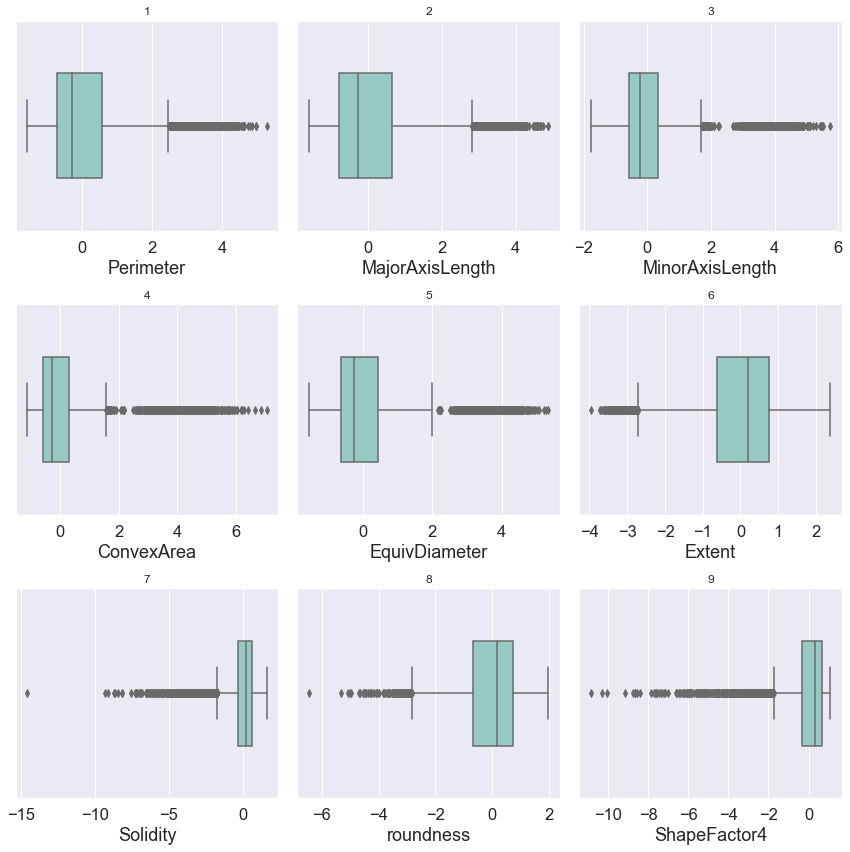

In [144]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
colnames = [i[1] for i in enumerate(beans_data_comp[feature_columns].columns)]
n = 0
sns.set(style="ticks", palette="pastel")
for i in range(3):
    for j in range(3):
        sns.boxplot(x=beans_data_comp[colnames[n]], ax=axes[i, j], orient="v", width=0.5, palette="Set3")
        n+=1
        axes[i, j].set_title(n)

plt.tight_layout()
plt.show()

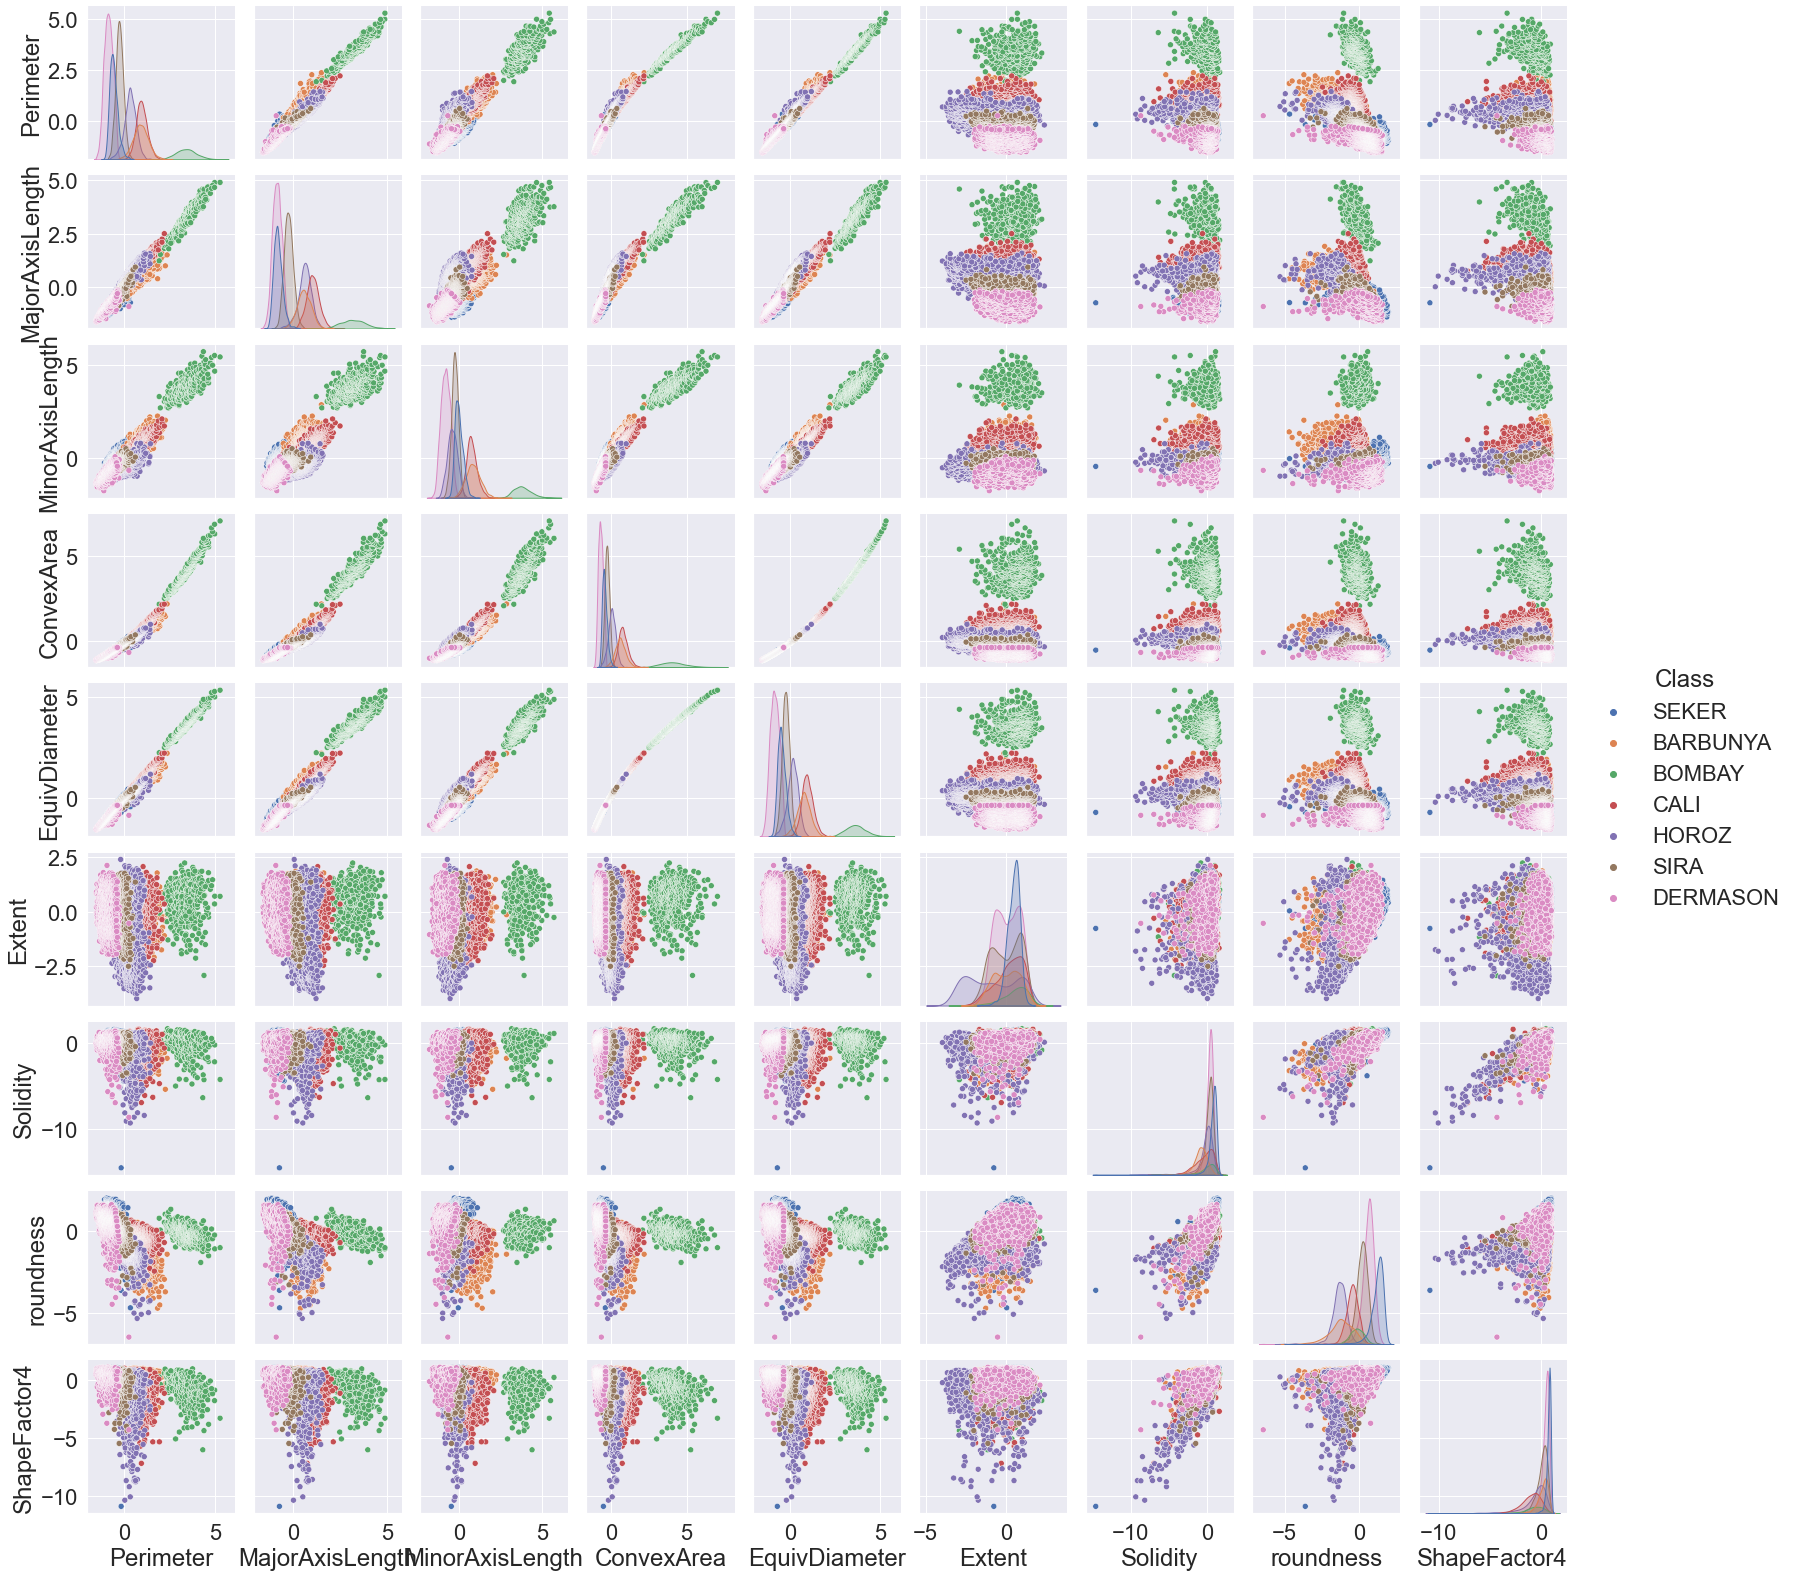

In [145]:
# Create a pair plot
sns.set(font_scale=2)
sns.pairplot(beans_data_comp, hue='Class', palette="deep")

# Display the plot
plt.show()

<p>The Bombay seeds seem to be more distinguishable as compared to other classes. Further more most features seem to be normally distibuted across the different classes as can be observed by the diagonal charts of the above pair-plot grid. We can test for normality of the data using Shapiro-wilk test.</p>

In [146]:
from scipy.stats import shapiro
from itertools import combinations

# defining function to calculate class-wise normality of the features

def classwise_normality_test(df, class_col):
    """
    Perform normality test for each column in a DataFrame based on class labels.

    Parameters:
    df (DataFrame): input DataFrame.
    class_col (str): name of the column containing class labels.

    Returns:
    A dictionary containing normality test results for each column based on class labels.
    """
    class_labels = df[class_col].unique()
    result_dict = {}

    for col in df.columns:
        if col != class_col:
            result_dict[col] = {}
            for label in class_labels:
                data = df[df[class_col]==label][col]
                stat, p = shapiro(data)
                result_dict[col][label] = {'p-value': p}
    return result_dict

# Looping over the feature columns to generate normality statistic
result = classwise_normality_test(beans_data_comp, "Class")
print(pd.DataFrame.from_dict(result))

                                    Perimeter  \
SEKER      {'p-value': 6.734302337302593e-22}   
BARBUNYA      {'p-value': 0.3677564263343811}   
BOMBAY       {'p-value': 0.24796320497989655}   
CALI      {'p-value': 1.9247758245910518e-05}   
HOROZ     {'p-value': 5.4941416749443306e-08}   
SIRA        {'p-value': 0.011683903634548187}   
DERMASON   {'p-value': 4.900020059844801e-12}   

                              MajorAxisLength  \
SEKER     {'p-value': 3.1933304316435366e-20}   
BARBUNYA      {'p-value': 0.8976413011550903}   
BOMBAY        {'p-value': 0.2143065333366394}   
CALI       {'p-value': 0.0002353509480599314}   
HOROZ       {'p-value': 1.73085341632212e-13}   
SIRA       {'p-value': 1.952003458427498e-06}   
DERMASON   {'p-value': 3.203329470125027e-05}   

                              MinorAxisLength  \
SEKER      {'p-value': 7.636299804518037e-18}   
BARBUNYA    {'p-value': 0.043749384582042694}   
BOMBAY     {'p-value': 7.974687719070062e-07}   
CALI       {'p-val

<p>There is no clear indication of normality among all the classes and features. However, many features show normality among classes.</p>

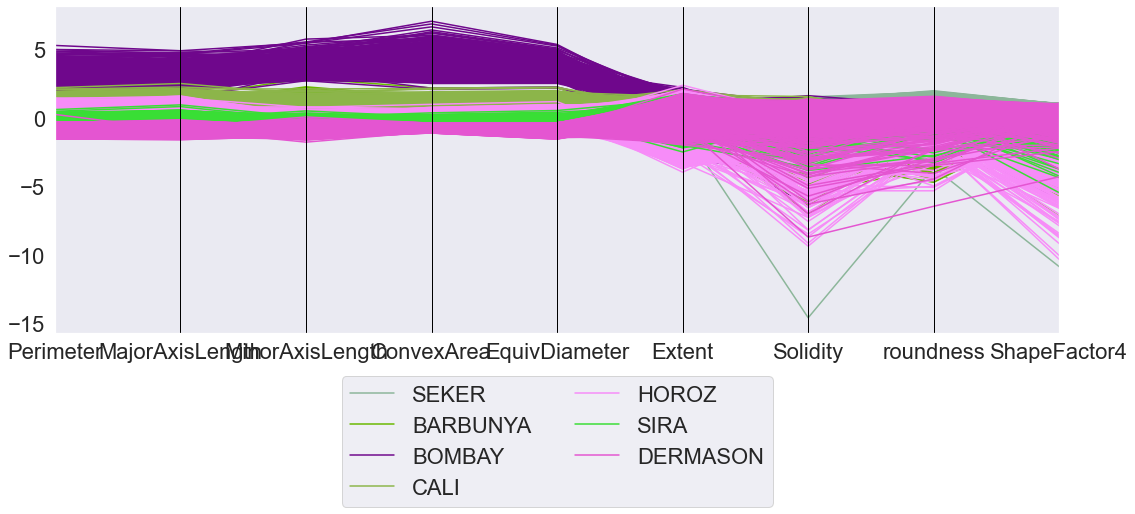

In [147]:
# Creating the parallel coordiantes plot
plt.figure(figsize=(18, 6))
pd.plotting.parallel_coordinates(beans_data_comp, 'Class')

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Show the plot
plt.show()

<p>
    Following features show more promising differentiability amongst the classes.
    <ul>
        <li>Perimeter</li>
        <li>Major Axis Length</li>
        <li>Convex Area</li>
        <li>Minor Axis Length</li>
        <li>Equivalent Diameter</li>
    </ul>
</p>

<h2>3. Model Development - Without validation</h2>

In [148]:
# Function to create stratified samples
def stratSample(df_input, stratify_colname, frac_train, random_state):
    X = df_input.drop(stratify_colname, axis=1) #Contains Feature Columns
    y = df_input[[stratify_colname]] # Dataframe of just the column on which to stratify. Class columns.

    # Split original dataframe into train and temp dataframes.
    df_train, df_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                          test_size=(1.0 - frac_train),
                                                          random_state=random_state)
    return df_train, df_test, y_train, y_test

In [149]:
X_train, X_test, y_train, y_test = stratSample(beans_data_comp, "Class", 0.8, 1)
X_train.head()

,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter,Extent,Solidity,roundness,ShapeFactor4
7926,-0.499051,-0.517725,-0.308468,-0.425112,-0.430841,-0.826292,0.477961,0.662075,0.387618
13111,-0.607548,-0.508509,-0.624176,-0.523487,-0.570031,0.420206,0.516545,0.500237,0.788920
8063,-0.271406,-0.152458,-0.648515,-0.388905,-0.392504,0.152596,-0.801433,-0.886499,-0.300410
1125,-0.609825,-0.752205,-0.078230,-0.455642,-0.469565,0.728205,0.928122,1.355483,0.824218
803,-0.430930,-0.747203,-0.270529,-0.500178,-0.552318,-0.192640,-1.275956,-0.836430,0.562363


In [150]:
# Checking the sample sizes
print("Taining sample size:",X_train.shape)
print("Testing sample size:",X_test.shape)

Taining sample size: (10888, 9)
Testing sample size: (2723, 9)


The data has been split into two parts namely, training and test datasets. As there is no dearth of data the it was decided to split the data in 2:1 proportion respectively. In other words 67% data was allocated to training data and rest for testing sample. This is a commonly used proportion used by data scientists.

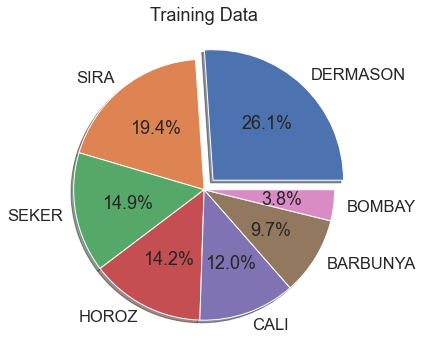

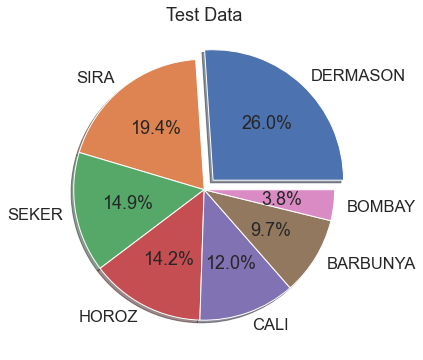

In [151]:
# Checking the samples for proportions of activity IDs
print("\n")
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

trainDataChart = nicePlots("piechart", train_df ,"Class", title='Training Data', ylabel="")
testDataChart = nicePlots("piechart", test_df ,"Class", title='Test Data', ylabel="")

The proportions of classes remain commensurate after the split which is the expected result.

In [152]:
beans_data_comp.describe()

,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter,Extent,Solidity,roundness,ShapeFactor4
count,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04
mean,-1.216596e-15,8.703803e-16,4.103445e-16,-9.092597e-16,-3.963800e-16,-1.876922e-15,-2.301027e-14,2.380687e-16,1.991064e-14
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.542583e+00,-1.593407e+00,-1.773645e+00,-1.111184e+00,-1.551678e+00,-3.960880e+00,-1.456945e+01,-6.446210e+00,-1.085036e+01
25%,-7.082260e-01,-7.799910e-01,-5.875797e-01,-5.727750e-01,-6.420997e-01,-6.335853e-01,-3.159613e-01,-6.919874e-01,-3.115721e-01
50%,-2.816033e-01,-2.714228e-01,-2.187975e-01,-2.885152e-01,-2.471687e-01,2.063003e-01,2.446575e-01,1.659247e-01,3.029170e-01
75%,5.690149e-01,6.576317e-01,3.282530e-01,2.863522e-01,4.458347e-01,7.562196e-01,6.159095e-01,7.323368e-01,6.456801e-01
max,5.273833e+00,4.886372e+00,5.735751e+00,7.036141e+00,5.345339e+00,2.372678e+00,1.616807e+00,1.972582e+00,1.069377e+00


<p>Assuming that features are distributed normally we will first create a Naive Bayes classifier.</p>

<h3>3.1 Naive Bayes Classification</h3>

In [153]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# make predictions on the testing data
y_pred = nb_classifier.predict(X_test)
y_score = nb_classifier.predict_proba(X_test)[:, 1]

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4)*100,"%")

Accuracy: 86.67 %


In [154]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, precision_recall_fscore_support

# Defining Functions to evaluate Model results
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm_norm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm_norm.shape[1]),
           yticks=np.arange(cm_norm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if cm_norm.dtype == 'float' else 'd'
    thresh = cm_norm.max() / 2.
    for i in range(cm_norm.shape[0]):
        for j in range(cm_norm.shape[1]):
            ax.text(j, i, format(cm_norm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm_norm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def classification_metrics(y_true, y_pred, y_prob, class_labels):
    """
    This function calculates and prints the precision, recall and F1 score for each class
    and plots the confusion matrix, ROC and precision-recall curves.
    """
    # Calculate precision, recall and F1 score for each class
    precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, labels=class_labels)
    df = pd.DataFrame(columns = ["Class","Precision","Recall","F1-Score","Support"])
    for i, label in enumerate(class_labels):
        new_row = {"Class":label, "Precision":round(precision[i],2), "Recall":round(recall[i],2)}
        df = df.append(new_row, ignore_index=True)
    f1_score = [round(f1, 2) for f1 in f1_score]
    df["F1-Score"] = f1_score
    df["Support"] = support
    return df

<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

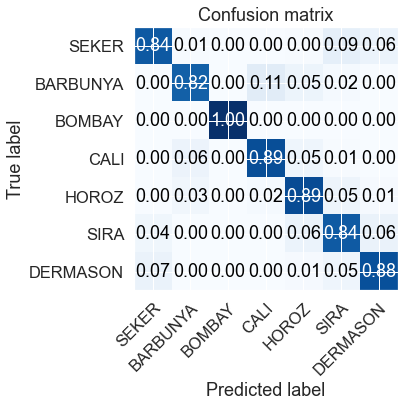

In [155]:
plot_confusion_matrix(y_test, y_pred, beans_data_comp["Class"].unique())

In [156]:
classification_metrics(y_test,y_pred, y_score, beans_data_comp["Class"].unique())

,Class,Precision,Recall,F1-Score,Support
0,SEKER,0.84,0.84,0.84,406
1,BARBUNYA,0.86,0.82,0.84,265
2,BOMBAY,0.99,1.0,1.00,104
3,CALI,0.89,0.89,0.89,326
4,HOROZ,0.83,0.89,0.86,386
5,SIRA,0.83,0.84,0.83,527
6,DERMASON,0.91,0.88,0.89,709


<p>As it can be observed from the confusion matrix and the above metrics that even the Gaussian Bayes Classification methodology gives decent results. We shall try more complex algorithm like Support vector machine on the dataset to check if there is any significance improvement over Naive Bayes algorithm.</p>

<h3>3.2 Random Forest Classification</h3>

In [157]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)[:, 1]

# Calculate the accuracy of the Random Forest Classifier on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100,2), "%")

Accuracy: 92.91 %


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

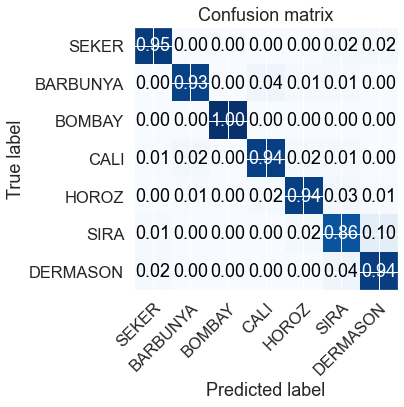

In [158]:
plot_confusion_matrix(y_test, y_pred, beans_data_comp["Class"].unique())

In [159]:
classification_metrics(y_test,y_pred, y_score, beans_data_comp["Class"].unique())

,Class,Precision,Recall,F1-Score,Support
0,SEKER,0.95,0.95,0.95,406
1,BARBUNYA,0.94,0.93,0.94,265
2,BOMBAY,0.99,1.0,1.00,104
3,CALI,0.94,0.94,0.94,326
4,HOROZ,0.95,0.94,0.94,386
5,SIRA,0.9,0.86,0.88,527
6,DERMASON,0.91,0.94,0.93,709


<h3>3.3 Support Vector Machine Classification</h3>

<h4>3.3.1 Using Linear Kernel</h4>

In [160]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initialize SVM classifier with linear kernel
svm = SVC(kernel='linear')

# Train the model on training set
svm.fit(X_train, y_train)

# Predict the labels of test set
y_pred = svm.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy*100,2), "%")

Accuracy: 92.8 %


<h4>3.3.2 Using Radial Basis Function Kernel</h4>

In [161]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initialize SVM classifier with linear kernel
svm = SVC(kernel='rbf', probability=True)

# Train the model on training set
svm.fit(X_train, y_train)

# Predict the labels of test set
y_pred = svm.predict(X_test)
y_score = svm.predict_proba(X_test)[:, 1]

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', round(accuracy*100,2), "%")

Accuracy: 93.06 %


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

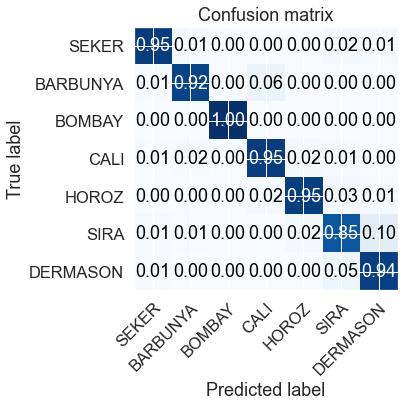

In [162]:
plot_confusion_matrix(y_test, y_pred, beans_data_comp["Class"].unique())

In [163]:
classification_metrics(y_test,y_pred, y_score, beans_data_comp["Class"].unique())

,Class,Precision,Recall,F1-Score,Support
0,SEKER,0.95,0.95,0.95,406
1,BARBUNYA,0.94,0.92,0.93,265
2,BOMBAY,0.99,1.0,1.00,104
3,CALI,0.93,0.95,0.94,326
4,HOROZ,0.95,0.95,0.95,386
5,SIRA,0.89,0.85,0.87,527
6,DERMASON,0.91,0.94,0.93,709


<h2>4. Model Development with K-Fold Cross Validation</h2> 

In [164]:
from sklearn.model_selection import KFold

# Creating a function to conduct K-Fold Validation test
def kfold_validation(X, y, model_type='rf', n_splits=5, random_state=42, svc_kernel="rbf"):
    """
    Conducts k-fold cross-validation for different classification algorithms
    X: features dataframe
    y: target dataframe
    model_type: type of classification model ('rf' for random forest, 'nb' for naive bayes, 'svm' for support vector machine)
    n_splits: number of folds for cross-validation
    random_state: random seed for reproducibility
    
    Returns the average accuracy score across all folds
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scores = []
    classwise_accuracies = []
    best_score = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        if model_type == 'rf':
            model = RandomForestClassifier(random_state=random_state)
        elif model_type == 'nb':
            model = GaussianNB()
        elif model_type == 'svm':
            model = SVC(kernel=svc_kernel, random_state=random_state)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        score = model.score(X_test, y_test)
        scores.append(score)
        
        if score > best_score:
            best_score = score
            best_model = model
        
        cm = confusion_matrix(y_test, y_pred, labels=beans_data_comp["Class"].unique())
        cm = cm.diagonal()/cm.sum(axis=1)
        classwise_accuracies.append(cm)
        
        mean_classwise_accuracies = [0]*7
        for i in range(len(classwise_accuracies)):
            mean_classwise_accuracies = mean_classwise_accuracies + classwise_accuracies[i]
            
        mean_classwise_accuracies = mean_classwise_accuracies/len(classwise_accuracies)   
        mean_classwise_accuracies = dict(zip(beans_data_comp["Class"].unique(),mean_classwise_accuracies))
    
    avg_score = sum(scores)/n_splits
    
    return avg_score, mean_classwise_accuracies, best_model

<h4>4.1 Naive Bayes Classification</h4>

In [165]:
X = beans_data_comp.drop("Class", axis=1) #Contains Feature Columns
y = beans_data_comp[["Class"]] # Dataframe of just the column on which to stratify. Class columns.

score, mean_classwise_accuracies_nb, model_bn = kfold_validation(X, y, model_type='nb', n_splits=10)
print('Average accuracy score:', round(score*100,2), "%")

Average accuracy score: 85.87 %


<h4>4.2 Random Forest Classification</h4>

In [166]:
X = beans_data_comp.drop("Class", axis=1) #Contains Feature Columns
y = beans_data_comp[["Class"]] # Dataframe of just the column on which to stratify. Class columns.

score, mean_classwise_accuracies_rf, model_rf = kfold_validation(X, y, model_type='rf', n_splits=10)
print('Average accuracy score:', round(score*100,2), "%")

Average accuracy score: 92.53 %


<h4>4.3 Support Vector Machines Classification - Radial Kernel</h4>

In [167]:
X = beans_data_comp.drop("Class", axis=1) #Contains Feature Columns
y = beans_data_comp[["Class"]] # Dataframe of just the column on which to stratify. Class columns.

score, mean_classwise_accuracies_svm, model_svm = kfold_validation(X, y, model_type='svm', n_splits=10)
print('Average accuracy score:', round(score*100,2), "%")

Average accuracy score: 92.87 %


<h2>5. Analysing The Results</h2>

In [168]:
def plot_classwise_accuracies(model1_accuracies, model2_accuracies, model3_accuracies, model_list):
    """
    This function plots class-wise accuracies for different classification algorithms
    model1_accuracies: Class-wise accuracies for model 1
    model2_accuracies: Class-wise accuracies for model 2
    model3_accuracies: Class-wise accuracies for model 3
    
    Does not return any value.
    """
    
    # Extract the class labels
    classes = list(model1_accuracies.keys())

    # Extract the accuracies for each modelorithm and class
    model1_values = list(model1_accuracies.values())
    model2_values = list(model2_accuracies.values())
    model3_values = list(model3_accuracies.values())

    # Convert the values to percentages
    model1_values = [v*100 for v in model1_values]
    model2_values = [v*100 for v in model2_values]
    model3_values = [v*100 for v in model3_values]

    # Set the position of the bars on the x-axis
    barWidth = 0.25
    r1 = np.arange(len(classes))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    plt.rcParams.update({'font.size': 32})
    plt.figure(figsize=(20,10))

    # Create the bar chart
    plt.bar(r1, model1_values, color='blue', width=barWidth, edgecolor='white', label=model_list[0])
    plt.bar(r2, model2_values, color='green', width=barWidth, edgecolor='white', label=model_list[1])
    plt.bar(r3, model3_values, color='red', width=barWidth, edgecolor='white', label=model_list[2])

    # Add some labels and formatting
    plt.xticks([r + barWidth for r in range(len(classes))], classes,  fontsize=24)
    plt.ylabel('Accuracy (%)', fontsize=24)
    plt.title('Comparing class-wise accuracies for three classification algorithms',  fontsize=24)
    plt.legend(loc='best', fontsize=20)

    # Show the plot
    plt.show()


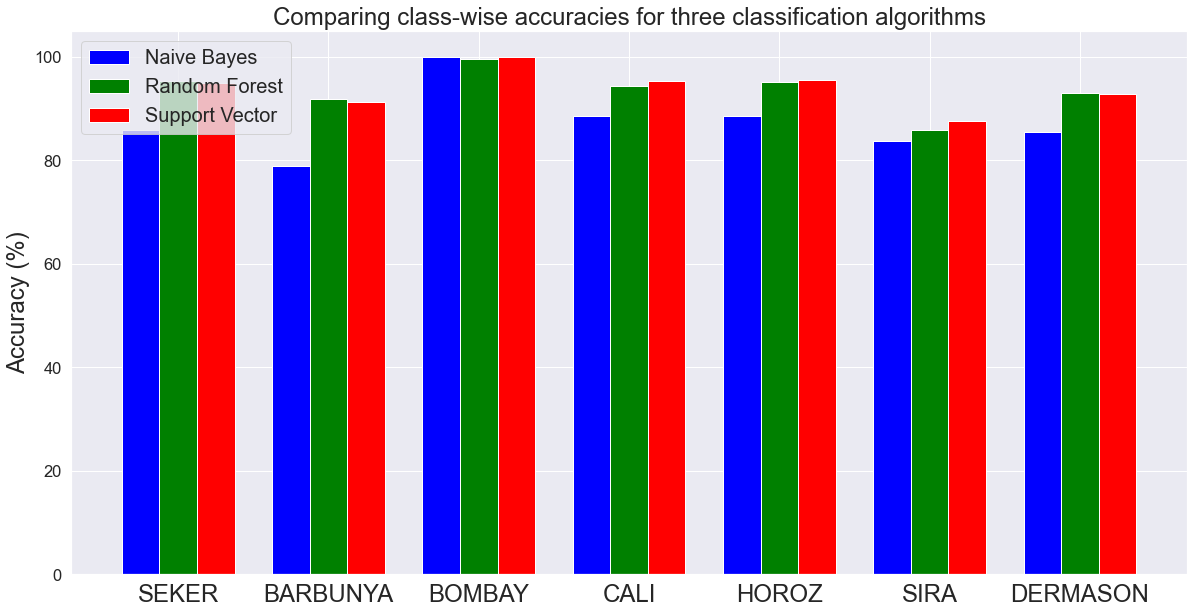

In [169]:
plot_classwise_accuracies(mean_classwise_accuracies_nb, mean_classwise_accuracies_rf, mean_classwise_accuracies_svm, ["Naive Bayes", "Random Forest", "Support Vector"])

<h3>Training Model with full Dataset</h3>

In [182]:
# Initialize SVM classifier with linear kernel
svm = SVC(kernel='rbf')

# Train the model on full data set
svm.fit(features, labels)

# Predict the labels of full data set
y_pred = svm.predict(features)

# Evaluate the accuracy of the model
accuracy = accuracy_score(labels, y_pred)
print('Accuracy:', round(accuracy*100,2), "%")

Accuracy: 93.17 %


In [183]:
# Creating a dataframe with predicted classes
y_pred_svm = svm.predict(X_test)
df = pd.DataFrame({'ID': X_test.index, 'Predicted Class': y_pred_svm})
df

,ID,Predicted Class
0,7872,SIRA
1,6718,HOROZ
2,6799,HOROZ
3,4649,CALI
4,6285,HOROZ
...,...,...
2718,1805,SEKER
2719,2317,BARBUNYA
2720,10829,DERMASON
2721,3066,BARBUNYA


In [184]:
df.to_csv('Automatic Detection Output.csv', index=False)